In [2]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [3]:
#reading csv file
#columns are separated using spaces in the file
columns_names = ["user_id", "item_id", "rating", "timestamp"] 
df = pd.read_csv("ml-100k/u.data", sep='\t', names=columns_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
#rows and columns count
df.shape

(100000, 4)

In [6]:
#no of unique users
df["user_id"].nunique()

943

In [7]:
#no. of unique movies
df["item_id"].nunique()

1682

In [8]:
#reading csv file containing movies info
movies_titles = pd.read_csv("ml-100k/u.item", sep='|',encoding='latin-1', header = None)

In [9]:
movies_titles.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
#total no. of movies and their features
movies_titles.shape

(1682, 24)

In [11]:
movies_titles.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64')

In [12]:
#only movie title and id is required
movies_titles = movies_titles[[0,1]]

In [13]:
movies_titles.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [14]:
movies_titles.columns = ['item_id', 'title']

In [15]:
movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [16]:
#we need movie title corresponding to each item_id in df frame
df = pd.merge(df, movies_titles, on="item_id")

In [17]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [18]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


## Data Analysis

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [20]:
#since, each movie is rated differently by users 
#finding average rating of each movie
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [21]:
"""
If a movie has 5 as the average rating, then either it has been higly rated by all the users
(which is not possible) or it has been rated by very 
less no. of users(only 2 and 3 users might have rated it)
"""
#counting no. of times a movie has been rated
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [22]:
#making a dataframe consisting of movie title, its average rating
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [23]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [24]:
#adding a new column in ratings dataframe denoting no. of times a movie has been rated
ratings['no. of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])

In [25]:
ratings.head()

,rating,no. of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [26]:
ratings.sort_values(by='rating',ascending=False)

,rating,no. of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


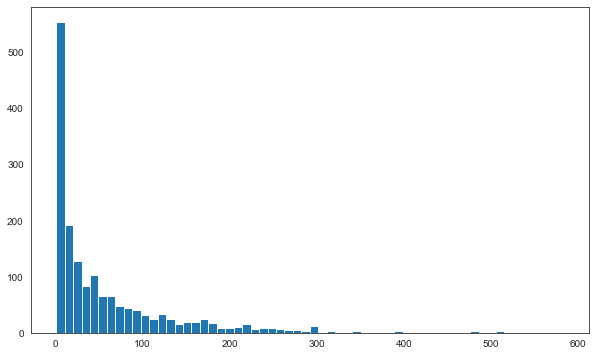

In [27]:
#from the above output, we can observe that a movie with rating 5 has been rated only once or twice
#drawing histogram of no. of ratings 
plt.figure(figsize=(10,6))
plt.hist(ratings['no. of ratings'] , bins = 60)
plt.show()

In [28]:
#from the above histogram, we can observe that our dataset contains more than 500 movies
#that have been rated less than 10 times.
#And the movies rated more than 300 times are also very less.

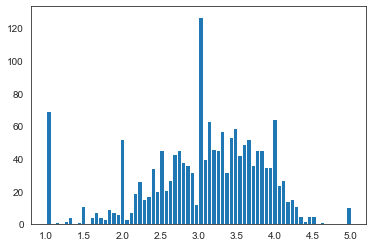

In [29]:
#creating a histogram for average ratings
plt.hist(ratings['rating'], bins = 70)
plt.show()

In [30]:
#More than 120 movies have a rating of 3.0 to 3.1
#There are very less no. of movies with 5 as their average rating

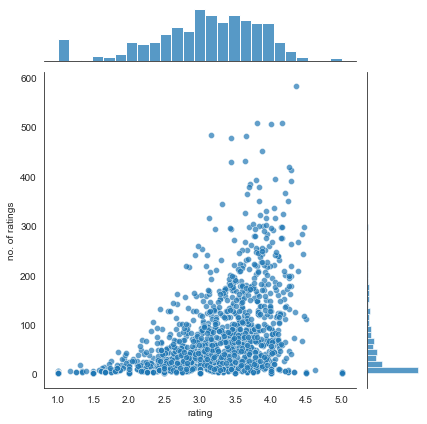

In [31]:
#creating a joint plot to find relation between no. of artings and average rating
sns.jointplot(x='rating', y='no. of ratings', data = ratings, alpha= 0.7)

In [32]:
#Observations: 
#Movie with rating 5 has very less no. of ratings
#no. of ratings and average rating are directly proportional under normal distribution
#A very popular movie will have average rating of 3.0 to 4.5 and no. of users who have watched it would also be high

## Creating Movie Recommender

In [33]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [34]:
ratings.head()

,rating,no. of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [35]:
#creating a matrix where rows denote user_ids and columns are movie_titles
#value inside matrix tells rating given by ith user to jth movie
movie_matrix = df.pivot_table(index='user_id', columns= 'title', values= 'rating')

In [36]:
movie_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
ratings.sort_values('no. of ratings', ascending= False).head()

,rating,no. of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [38]:
starwars_user_ratings = movie_matrix['Star Wars (1977)']

In [39]:
#finding individual rating given by users to Star Wars
starwars_user_ratings

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [40]:
# correlating above data with movie_matrix
#using pandas function
similar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [41]:
#above output shows how correlated is Star wars movie with other movies

In [42]:
correlation_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
correlation_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [43]:
#dropping NaN
correlation_starwars.dropna(inplace= True)

In [44]:
correlation_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [45]:
correlation_starwars.sort_values('Correlation', ascending=False)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [46]:
#Observation:
#Hollow Reed, Commandments and other movies with correlation 1 are highly similar to Star Wars

In [47]:
print(ratings.loc['Hollow Reed (1996)'].astype(int))


rating            2
no. of ratings    6
Name: Hollow Reed (1996), dtype: int32


In [48]:
#although Hollow Reed is highly correlated to Star Wars but it has been rated only 6 no. of times

In [49]:
#filtering the movies on the basis of no. of ratings

In [50]:
#joining the correlation_starwars and ratings dataframe
correlation_starwars = correlation_starwars.join(ratings['no. of ratings'])
correlation_starwars

,Correlation,no. of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [51]:
correlation_starwars.head()

,Correlation,no. of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [52]:
#storing only those movies in correlation_movies matrix which have been rated more than 100 times
correlation_starwars[correlation_starwars['no. of ratings']>100].sort_values('Correlation', ascending=False)

,Correlation,no. of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [53]:
#we can observe that after filtering out, the movie highly correlated to Star Wars is Empire Strikes 

## Recommend Function

In [54]:
def recommend_movies(movie_name):
    movie_user_ratings= movie_matrix[movie_name] #ratings given by all users to the reqd movie
    similar_to_movie = movie_matrix.corrwith(movie_user_ratings)#correlation of given movie with all other movies
    
    correlation_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])#creating dataframe 
    correlation_movie.dropna(inplace= True)#dropping NaN
    
    #joining the correlation_starwars and ratings dataframe
    correlation_movie = correlation_movie.join(ratings['no. of ratings'])
    
    #storing only those movies in correlation_movies matrix which have been rated more than 100 times
    recommendations = correlation_movie[correlation_movie['no. of ratings']>100].sort_values('Correlation', ascending=False)
    
    return recommendations

## Testing

In [55]:
recommendations = recommend_movies("Titanic (1997)")

In [56]:
recommendations.head()

,Correlation,no. of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
